In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Problem Statement:**
The goal is to identify characteristics of the target audience for each treadmill based on demographic and behavioral factors such as age, income, fitness level, and usage patterns. This will allow Aerofit to:



1.   Personalize product recommendations for new customers.
2.   Optimize marketing campaigns for specific customer segments.
3. Inform inventory planning and pricing strategies using data insights.



Objective of the Analysis:

1.Perform descriptive analytics to create a customer profile for each treadmill.

2.Conduct probability analysis (marginal and conditional) to understand purchasing patterns.

3.Provide actionable recommendations based on the findings to guide Aerofit’s business strategy.

**1. Import & Inspecting Dataset**

1.1 Importing dataset

In [2]:
df = pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


1.2 Check structure shape & Characteristics

In [3]:
df.shape

(180, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB




1.   Shape of data : the dataset contains total 180 rows and 9 columns.
2.   Data Types : the categorical columns are (Product, Gender, MaritalStatus) and numerical are (Age, Education,Income, Usage, Fitness, Miles)



1.3 Convert Columns to Appropriate Data Types

In [5]:
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

#confirm
print(df.dtypes)

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object


1.4 Statastical Summary

In [6]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Based on the above statastical summary we infer that
1. count : All columns have a count of 180, which confirms there are no missing values in any of the numerical columns.
2. Mean : This is the average value for each column. For example, the average age of customers is approximately 28.8 years, the average education level is around 15.6 years, and the average income is about $53,720. The average expected weekly usage is about 3.5 times, the average self-rated fitness level is about 3.3, and customers typically plan to walk/run
 about 103 miles per week.

3. std : Standard Deviation (std):** This measures the spread or variability of the data around the mean. A higher standard deviation indicates more spread. For example, the standard deviation for Income $$53,720. The average expected weekly usage is about 3.5 times, the average self-rated fitness level is about 3.3, and customers typically plan to walk/run about 103 miles per week.

4. Median (50%): The middle value when data is sorted. It divides the dataset into two equal halves. In this case, median values (e.g., age 26, income $50,596.50) represent typical customer characteristics. Comparing mean and median helps identify skewness; a higher mean than median indicates a positive skew.

5. 75th Percentile (3rd Quartile): The value below which 75% of observations fall. It indicates the upper range of typical values (e.g., age ≤33, income ≤$58,668). It helps understand the spread and concentration of higher values in the dataset.

6. Max: The maximum value in each column. The oldest customer is 50, the highest education level is 21 years, the maximum usage is 7 times per week, the highest fitness rating is 5, the highest income is $104,581, and the maximum planned miles is 360.

3 Data Quality Check

3.1 Check for nulls

In [7]:
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


no missing or null values found, dataset is complete

3.2 Outlier Detection using Boxplot

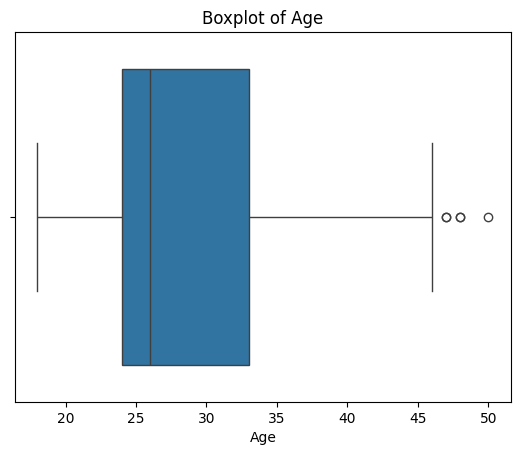

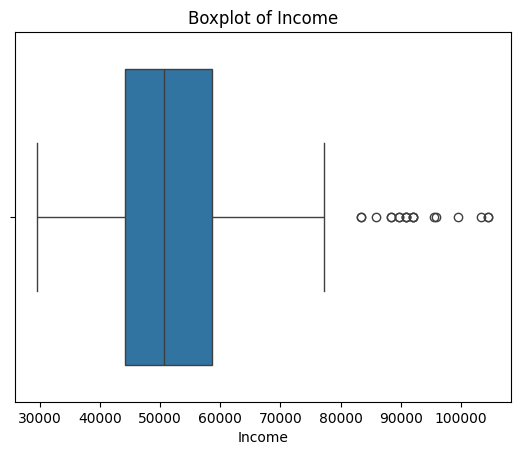

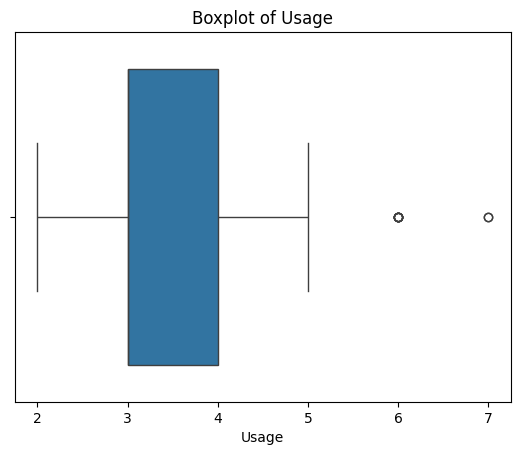

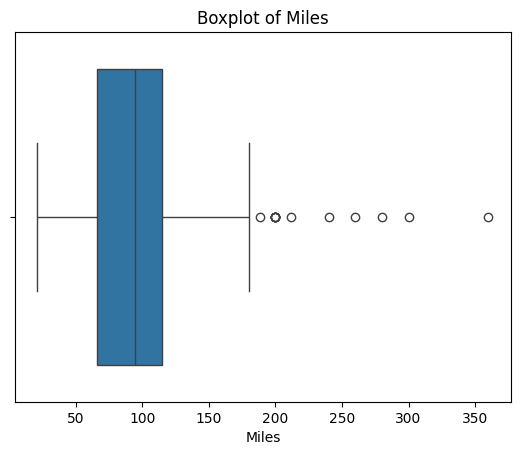

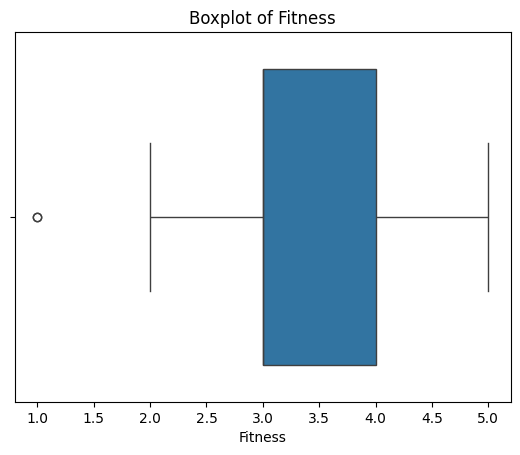

In [8]:
numeric_column = ['Age', 'Income', 'Usage', 'Miles', 'Fitness']
for col in numeric_column:
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

Based on this boxplots we can say that:

**Age:** The boxplot shows that the majority of customers are between approximately 24 and 33 years old (the interquartile range). The median age is around 26. There are a few potential outliers on the higher end of the age spectrum, indicating some customers are older than the typical range.

**Income:** The boxplot for income shows a wider spread compared to age. The interquartile range suggests that most incomes fall between roughly   $$44,000 and $58,000. There are several potential outliers on the higher end, indicating a number of customers with significantly higher incomes.

**Usage:** The boxplot for usage indicates that most customers plan to use the treadmill between 3 and 4 times per week. The median is at 3 uses per week. There are a few potential outliers at 6 and 7 uses per week, suggesting some customers have much higher usage intentions.

**Miles:** The miles boxplot also shows a considerable spread. The majority of customers plan to walk/run between approximately 66 and 115 miles per week. The median is around 94 miles. There are several potential outliers on the higher end, indicating some customers plan to cover significantly more miles.

**Fitness:** The fitness boxplot shows that most customers rate their fitness level between 3 and 4. The median is at 3. There is one potential outlier at a fitness rating of 1, suggesting a customer with a much lower self-rated fitness level compared to the rest of the group.

3.3 Compare mean vs. median

In [9]:
stats = df[numeric_column].agg(['mean', 'median'])
stats

,Age,Income,Usage,Miles,Fitness
mean,28.788889,53719.577778,3.455556,103.194444,3.311111
median,26.000000,50596.500000,3.000000,94.000000,3.000000


Looking at the stats DataFrame comparing the mean and median for each numeric column, we can say that

**Age:** The mean (28.79) is slightly higher than the median (26.00). This suggests a slight positive skew in the age distribution, meaning there are a few older individuals pulling the mean up.


**Income:** The mean ($53719.58) is high than the median  50596.50 This indicates a positive skew in the income distribution, which is also visible in the boxplot with the outliers on the higher end. This means there are a number of customers with significantly higher incomes than the majority.

**Usage:** The mean (3.46) is slightly higher than the median (3.00). This suggests a slight positive skew in the usage data, indicating a few customers plan to use the treadmill more frequently than the typical customer.

**Miles:**The mean (103.19) is higher than the median (94.00). This also indicates a positive skew in the planned miles, with some customers planning to cover significantly more miles than the average. This aligns with the outliers seen in the miles boxplot.

**Fitness:** The mean (3.31) is slightly higher than the median (3.00). This suggests a slight positive skew in the fitness ratings, although the difference is less pronounced than in Income or Miles. The outlier at 1 also contributes to this.

in summary we say that the mean is greater than the median, indicating a positive skew. This means that these distributions have a tail extending towards higher values, often due to the presence of outliers or a concentration of data on the lower end with fewer values on the higher end.


4 Non Graphical Analysis

4.1 value Counts for Categorical Variables

In [10]:
#product distribution
print(df['Product'].value_counts())

#gender distribution
print(df['Gender'].value_counts())

#maritalstatus distribution
print(df['MaritalStatus'].value_counts())

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64
Gender
Male      104
Female     76
Name: count, dtype: int64
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64


The KP281 is the most purchased model followed by KP481 & KP781.
the majority buyers are male compare to the female, the Partnered customers showing the higher share of the purchses.

4.2 Unique Attributes

In [11]:
# no. of unique values per columns
df.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


The income and age shows the vide variation indicating tha the diverse coustomer base.
fitness level range from 1 to 5

4.3 Descriptive Statistics for Continuous Variables

In [12]:
# Summary statistics
print(df[['Age', 'Income', 'Usage', 'Miles', 'Fitness']].describe())

              Age         Income       Usage       Miles     Fitness
count  180.000000     180.000000  180.000000  180.000000  180.000000
mean    28.788889   53719.577778    3.455556  103.194444    3.311111
std      6.943498   16506.684226    1.084797   51.863605    0.958869
min     18.000000   29562.000000    2.000000   21.000000    1.000000
25%     24.000000   44058.750000    3.000000   66.000000    3.000000
50%     26.000000   50596.500000    3.000000   94.000000    3.000000
75%     33.000000   58668.000000    4.000000  114.750000    4.000000
max     50.000000  104581.000000    7.000000  360.000000    5.000000


Average income is around $45,000 with spred standard deviation aroud 1500.00

Typical usage is 3-4 times per week; miles expected average ~50.”

5 Visual Analysis (Univariate & Bivariate)

5.1 Univariate Analysis

a. Continuous variabl

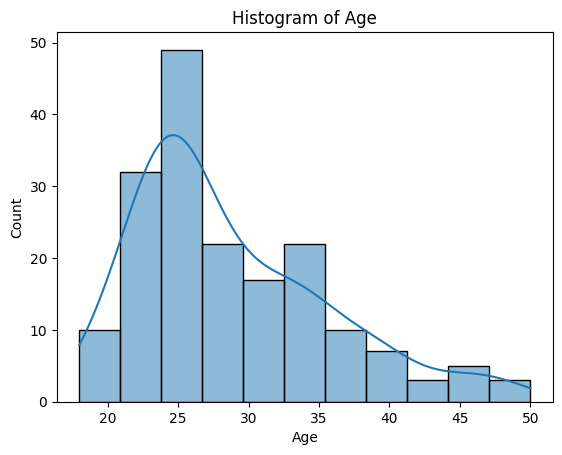

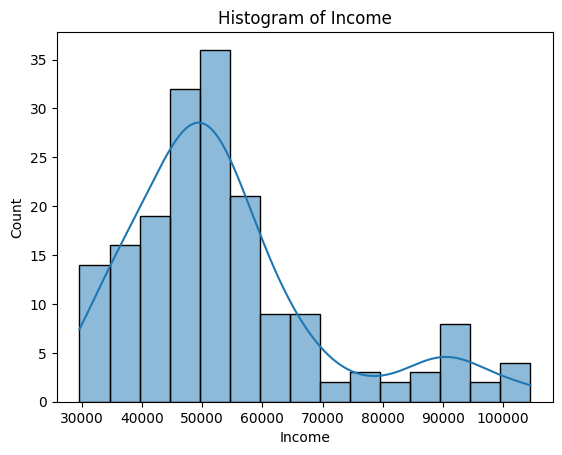

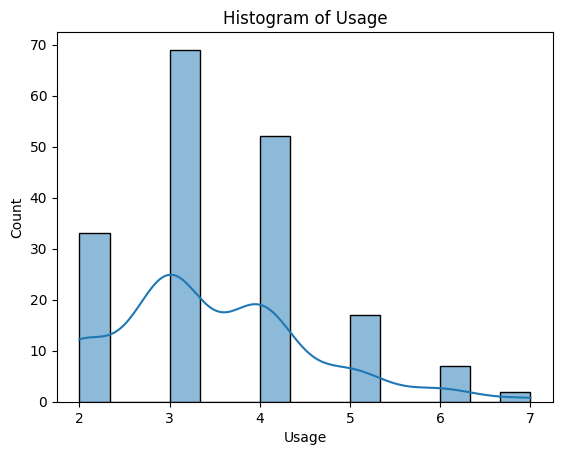

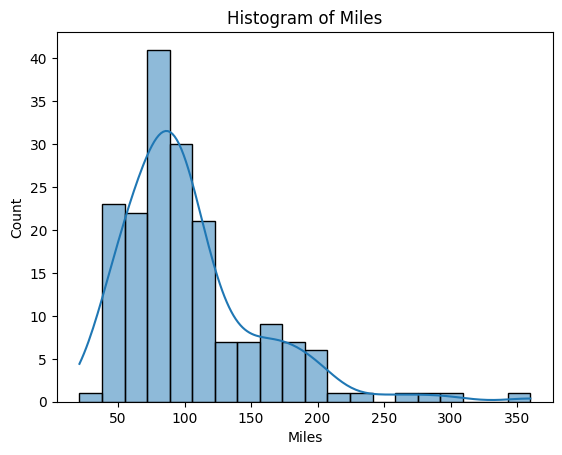

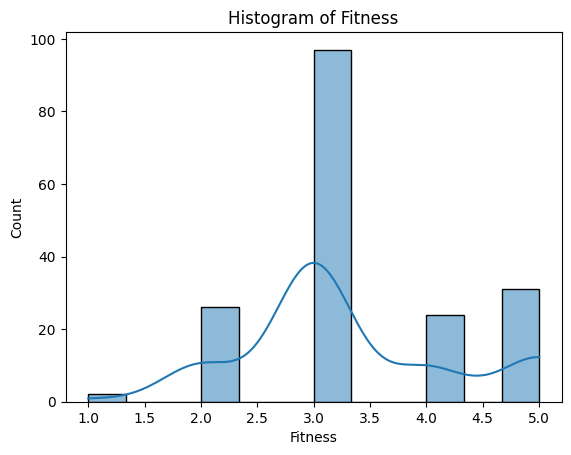

In [13]:
for col in ['Age', 'Income', 'Usage', 'Miles', 'Fitness']:
  sns.histplot(df[col], kde=True)
  plt.title(f'Histogram of {col}')
  plt.show()

Based on the histograms:

**Age:** The distribution is somewhat skewed to the right, with a peak around the mid-20s. This suggests that a large portion of customers are young adults.

**Income:** The income distribution is also right-skewed, indicating that most customers have incomes in the lower to middle range, with fewer customers having very high incomes.

**Usage:** The usage histogram shows peaks at 3 and 4 times per week, with fewer customers planning to use the treadmill less or more frequently. This suggests that most customers have moderate usage intentions.

**Miles:** The miles distribution is right-skewed, with a concentration of customers planning to run or walk a moderate number of miles per week. There is a tail extending towards higher mileage, indicating some customers are training for longer distances.

**Fitness:** The fitness rating distribution shows that most customers rate their fitness level as 3 or 4, with fewer customers rating themselves as 1, 2, or 5. This suggests that the majority of customers perceive themselves as having a moderate to good fitness level.

b Categorical Variables (Countplots)

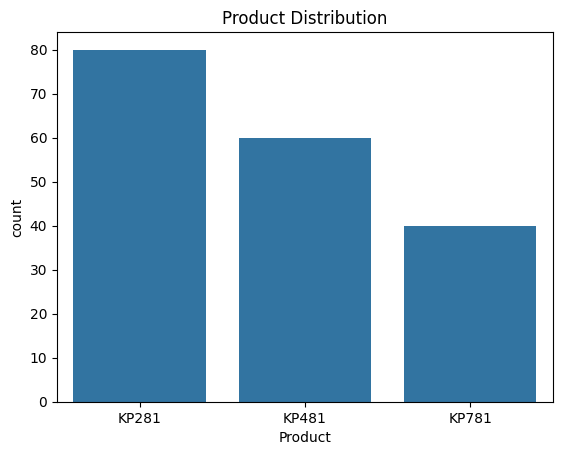

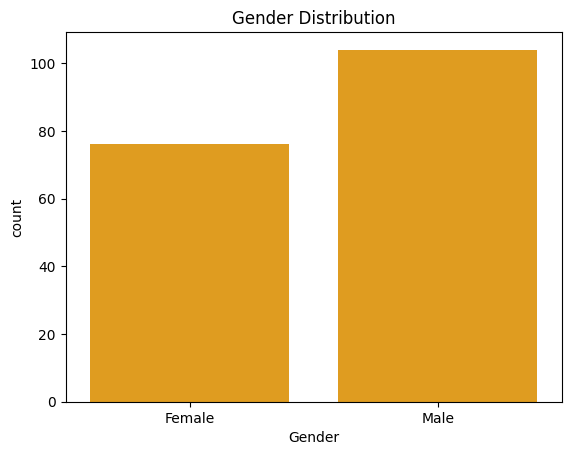

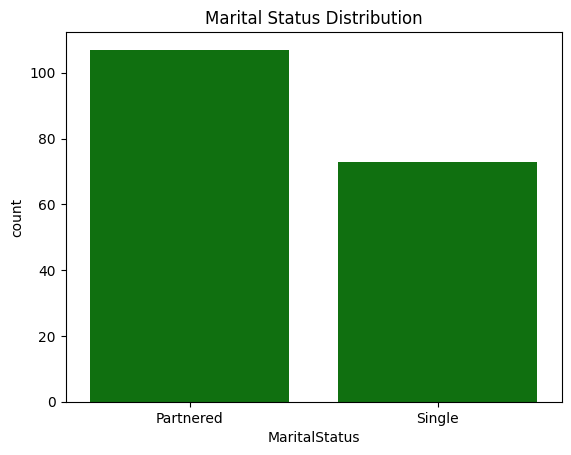

In [20]:
sns.countplot(data=df, x='Product')
plt.title('Product Distribution')
plt.show()

sns.countplot(data=df, x='Gender',color='orange')
plt.title('Gender Distribution')
plt.show()

sns.countplot(data=df, x='MaritalStatus',color='green')
plt.title('Marital Status Distribution')
plt.show()


Based on the countplots:

**Product Distribution:** The countplot clearly shows that the KP281 model is the most popular, followed by the KP481, and then the KP781. This indicates varying levels of demand for each treadmill model.

**Gender Distribution:** The countplot shows that there are more male customers than female customers in the dataset.

**Marital Status Distribution:** The countplot indicates that there are more partnered customers than single customers.

5.2 Bivariate Analysis

a.  Product vs Income (Boxplot)

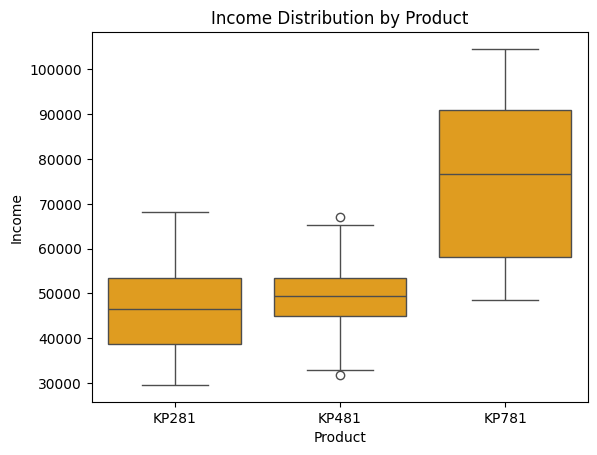

In [17]:
sns.boxplot(data=df, x='Product', y='Income',color='orange')
plt.title('Income Distribution by Product')
plt.show()

Based on the boxplot of Income Distribution by Product:

*   **KP281:** This model is associated with the lowest income range, with the median income being the lowest among the three products. This suggests that the KP281 is the most budget-friendly option and is purchased by customers with lower to middle incomes.
*   **KP481:** The income distribution for the KP481 is slightly higher than that of the KP281, with a higher median income. This indicates that the KP481 is a mid-range option appealing to customers with slightly higher incomes than KP281 buyers.
*   **KP781:** The KP781 model is clearly associated with the highest income range, with the median income significantly higher than the other two products. This suggests that the KP781 is a premium product purchased by customers with higher incomes.

In summary, there is a clear relationship between income level and the purchased treadmill model, with higher-income customers tending to purchase the more expensive KP781 model.

b. Product vs Age (Boxplot)

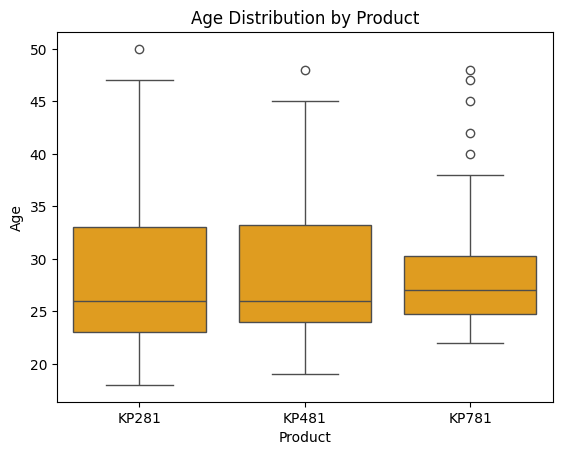

In [18]:
sns.boxplot(data=df, x='Product', y='Age',color='orange')
plt.title('Age Distribution by Product')
plt.show()

Based on the boxplot of Age Distribution by Product:

*   **KP281:** The age distribution for the KP281 is relatively wide, with the median age in the mid-20s. This model seems to appeal to a broad age range, including younger adults.
*   **KP481:** The age distribution for the KP481 is similar to the KP281, also showing a wide range with the median in the mid-20s. There isn't a strong indication that this model is preferred by a significantly different age group than the KP281.
*   **KP781:** The age distribution for the KP781 appears to be slightly shifted towards older ages compared to the other two models, although there is still a considerable spread. The median age might be slightly higher, and there are more outliers at older ages. This suggests that while the KP781 is purchased by various age groups, it might be more popular among slightly older customers, potentially those with higher incomes as seen in the previous boxplot.

In summary, while all products are purchased by a range of ages, the KP781 might be slightly more popular with older customers, which could be related to its higher price point and the typical income progression with age.

c. Product vs Gender (Countplot)

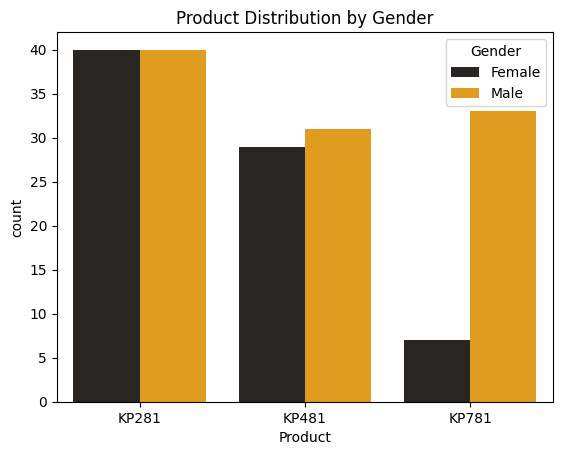

In [23]:
import warnings; warnings.filterwarnings('ignore')

sns.countplot(data=df, x='Product', hue='Gender',color='orange')
plt.title('Product Distribution by Gender')
plt.show()

Based on the countplot of Product Distribution by Gender:

*   **KP281:** Both males and females purchase this model, with a slightly higher number of males.
*   **KP481:** Similar to the KP281, both genders purchase this model, with a slightly higher number of males.
*   **KP781:** This model is predominantly purchased by males, with a significantly smaller number of female buyers.

In summary, the KP281 and KP481 models have a more balanced gender distribution, while the KP781 model appears to be more popular among male customers. This could be related to the KP781 being a higher-performance model, potentially appealing more to a male demographic, or it could be influenced by other factors like income, as seen in the previous analysis.

d. Product vs Marital Status (Countplot)

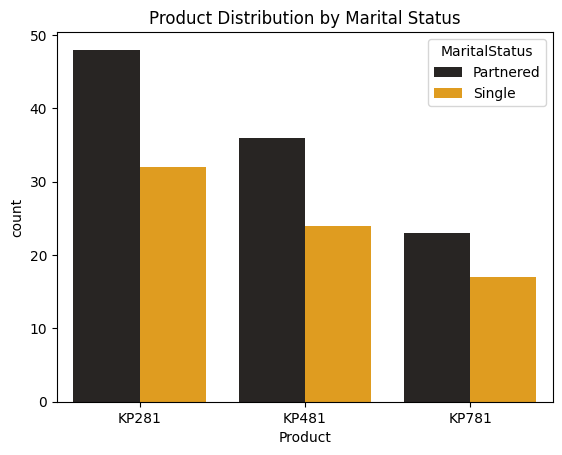

In [24]:
sns.countplot(data=df, x='Product', hue='MaritalStatus',color='orange')
plt.title('Product Distribution by Marital Status')
plt.show()

Based on the countplot of Product Distribution by Marital Status:

*   **KP281:** Partnered customers purchase the KP281 more frequently than single customers.
*   **KP481:** Similar to the KP281, partnered customers purchase the KP481 more frequently than single customers.
*   **KP781:** Partnered customers also purchase the KP781 more frequently than single customers, although the difference is less pronounced than for the other two models.

In summary, across all three product lines, partnered customers tend to purchase treadmills more often than single customers. This could be due to various factors, such as shared household income, a focus on shared fitness goals, or the influence of a partner in the purchasing decision.

5.3 Correlation Analysis

a. Heatmap

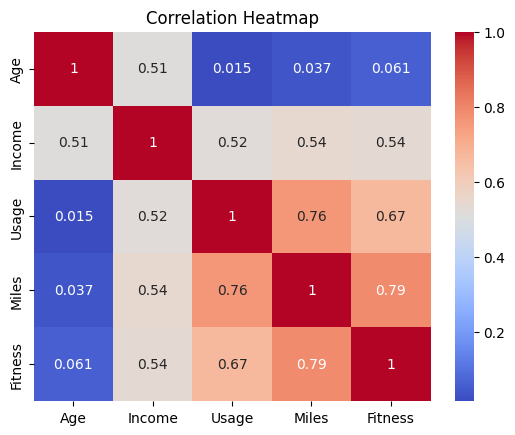

In [27]:
corr = df[['Age', 'Income', 'Usage', 'Miles', 'Fitness']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Based on the correlation heatmap:

*   **Income and Age:** There is a moderate positive correlation (0.51) between Income and Age, suggesting that as age increases, income tends to increase as well.
*   **Usage and Income:** There is a moderate positive correlation (0.52) between Usage and Income, indicating that customers with higher incomes tend to use the treadmill more frequently.
*   **Miles and Income:** There is a moderate positive correlation (0.54) between Miles and Income, suggesting that customers with higher incomes tend to plan for longer distances on the treadmill.
*   **Fitness and Income:** There is a moderate positive correlation (0.54) between Fitness and Income, indicating that customers with higher incomes tend to rate their fitness level higher.
*   **Usage and Miles:** There is a strong positive correlation (0.76) between Usage and Miles, which is expected as more frequent usage likely leads to covering more miles.
*   **Fitness and Usage:** There is a strong positive correlation (0.67) between Fitness and Usage, suggesting that customers who use the treadmill more frequently tend to have a higher self-rated fitness level.
*   **Fitness and Miles:** There is a strong positive correlation (0.79) between Fitness and Miles, indicating that customers who plan to cover more miles tend to have a higher self-rated fitness level.
*   **Age with Usage, Miles, and Fitness:** The correlations between Age and Usage, Miles, and Fitness are very low (close to 0), suggesting that age does not have a significant linear relationship with how often customers plan to use the treadmill, the miles they plan to cover, or their self-rated fitness level.

In summary, income, usage, miles, and fitness are positively correlated with each other, while age has a weaker correlation with usage, miles, and fitness. This suggests that customers with higher incomes are more likely to use the treadmills more often, cover more miles, and have higher fitness levels.it also suggesting wealthier customers are more active.

b. Pairplot

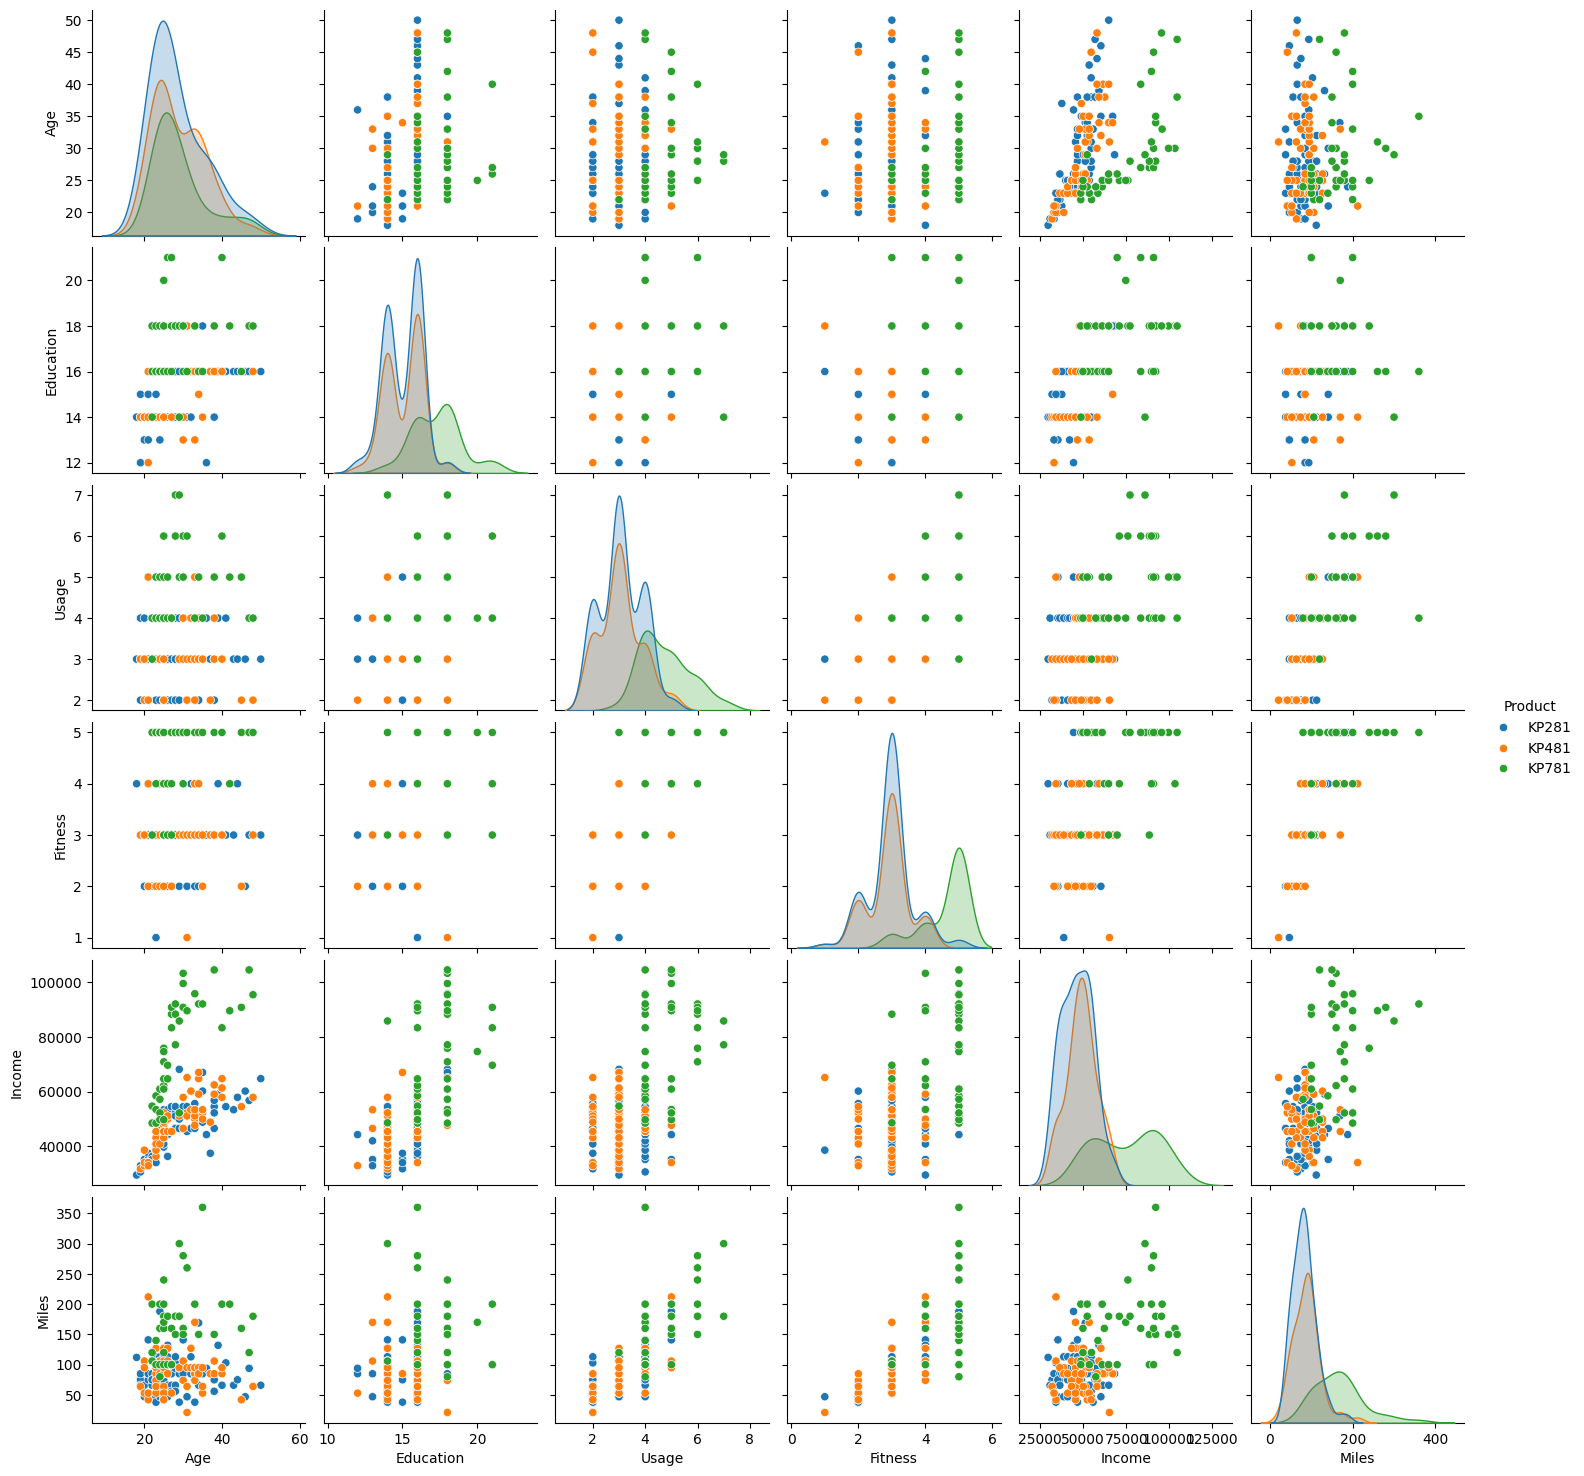

In [29]:
sns.pairplot(df, hue='Product')
plt.show()


From the pairplot, we can observe:

*   **KP781 customers** generally have higher incomes, higher self-rated fitness levels, plan for higher weekly usage, and intend to cover more miles compared to customers of the other two models.
*   There's a positive correlation between **Income, Usage, Miles, and Fitness**, which is more pronounced for customers who purchased the KP781.
*   **Age and Education** have less clear linear relationships with the other variables, and their distributions vary somewhat across the products.
*   The distributions of **Usage, Miles, and Fitness** are distinctly different for the KP781 compared to the KP281 and KP481, suggesting different customer segments with varying fitness goals and habits are drawn to the higher-end model.

 6: Customer Profiling by Product

It helps to summarize the characteristics of customers purchasing each treadmill (KP281, KP481, KP781) using descriptive statistics and categorical distributions.



6.1 Group by Product and Summarize Continuous Variables

In [30]:
# Profile by product
profile = df.groupby('Product').agg({
    'Age': 'mean',
    'Income': 'mean',
    'Usage': 'mean',
    'Miles': 'mean',
    'Fitness': 'mean'
}).round(2)

print(profile)


           Age    Income  Usage   Miles  Fitness
Product                                         
KP281    28.55  46418.02   3.09   82.79     2.96
KP481    28.90  48973.65   3.07   87.93     2.90
KP781    29.10  75441.58   4.78  166.90     4.62


Based on the summary statistics grouped by product:

*   **KP281:** Customers who purchase the KP281 have the lowest average income, usage, miles, and fitness levels compared to the other two products. Their average age is similar to the KP481. This suggests that the KP281 appeals to a customer segment with lower income and potentially more moderate fitness goals or less intense usage patterns.
*   **KP481:** Customers who purchase the KP481 have slightly higher average income, usage, and miles than KP281 customers, but lower than KP781 customers. Their average fitness level is also similar to KP281 customers, and their average age is very close to both the KP281 and KP781. This indicates that the KP481 is a mid-range option that attracts customers with slightly higher resources and perhaps slightly more ambitious fitness goals than KP281 buyers, but not as high as KP781 buyers.
*   **KP781:** Customers who purchase the KP781 have significantly higher average income, usage, miles, and fitness levels compared to the other two products. Their average age is slightly higher than the other two products. This strongly suggests that the KP781 is a premium product purchased by a customer segment with higher disposable income, more serious fitness goals, and more intense usage patterns. They are likely more experienced or dedicated to fitness.

In summary, the customer profiles for each product are distinct, primarily differing in income, usage, miles, and fitness levels. The KP281 is for budget-conscious, moderate users; the KP481 is for mid-range users; and the KP781 is for higher-income, high-performance users.

6.2 Gender Distribution by Product

In [32]:
gender_dist = pd.crosstab(df['Product'], df['Gender'], normalize='index') * 100
print(gender_dist)


Gender      Female       Male
Product                      
KP281    50.000000  50.000000
KP481    48.333333  51.666667
KP781    17.500000  82.500000


“KP281 has a balanced gender split, while KP781 has more male buyers.”



6.3 Marital Status Distribution by Product

In [33]:
marital_dist = pd.crosstab(df['Product'], df['MaritalStatus'], normalize='index') * 100
print(marital_dist)


MaritalStatus  Partnered  Single
Product                         
KP281               60.0    40.0
KP481               60.0    40.0
KP781               57.5    42.5


The 57.5 % of Partnered customers dominate KP781, while KP281 and KP481 has more singles with 40 %

6.4 Customer Profile Summary

KP281 (Entry-level): Younger, lower-income, casual users, balanced gender, more singles.

KP481 (Mid-range): Middle-aged, moderate-income, consistent treadmill usage, evenly split marital status.

KP781 (Premium): Older, high-income, fitness-oriented, more partnered customers, slightly male-dominated.

 7: Probability Analysis (Marginal & Conditional)

This help to calculates marginal probabilities (overall likelihood of each product being purchased) and conditional probabilities (likelihood of certain customer characteristics given a product, or vice versa).



7.1 Marginal Probability of Product Purchase
Shows the percentage of customers buying each treadmill, regardless of other factors.

In [37]:
# Marginal probability distribution
marginal_prob = pd.crosstab(index=df['Product'], columns='count', normalize=True) * 100
print(marginal_prob)


col_0        count
Product           
KP281    44.444444
KP481    33.333333
KP781    22.222222


44% of customers purchased KP281, 33.33% purchased KP481, and 22.22% purchased KP781.

It Helps Aerofit understand overall demand for each product.

7.2 Conditional Probability: Gender given Product
Probability of a customer being male/female given they purchased a particular treadmill.

In [38]:
# Two-way contingency table: Product vs Gender
contingency_gender = pd.crosstab(df['Product'], df['Gender'])

# Conditional probability: P(Gender | Product)
cond_prob_gender = contingency_gender.div(contingency_gender.sum(axis=1), axis=0) * 100
print(cond_prob_gender)


Gender      Female       Male
Product                      
KP281    50.000000  50.000000
KP481    48.333333  51.666667
KP781    17.500000  82.500000


The KP781 premium product in more popular among the male customers with 82.50 % and KP281 with 50-50 % both in male and female.

7.3 Conditional Probability: Product given Gender
Probability of a customer purchasing a product given they are male or female.

In [39]:
# Conditional probability: P(Product | Gender)
cond_prob_product_given_gender = contingency_gender.div(contingency_gender.sum(axis=0), axis=1) * 100
print(cond_prob_product_given_gender)


Gender      Female       Male
Product                      
KP281    52.631579  38.461538
KP481    38.157895  29.807692
KP781     9.210526  31.730769


Males are more likely to purchase KP781 (30%) than females.

7.4 Conditional Probability: Product given Marital Status

In [41]:
# Two-way contingency table: Product vs Marital Status
contingency_marital = pd.crosstab(df['Product'], df['MaritalStatus'])

# Conditional probability: P(Product | Marital Status)
cond_prob_product_given_marital = contingency_marital.div(contingency_marital.sum(axis=0), axis=1) * 100
print(cond_prob_product_given_marital)


MaritalStatus  Partnered     Single
Product                            
KP281          44.859813  43.835616
KP481          33.644860  32.876712
KP781          21.495327  23.287671


KP281 and KP481 are quite more famous in the partnered customers.

7.5 Business Relevance of Probabilities

Marginal probability indicates overall market share of each product.

Conditional probability helps profile customer segments (e.g., high-income males → KP781).

These insights can guide targeted campaigns, pricing, and stock allocation.

 8: Correlation & Relationships

This help to identifies relationships among continuous variables (Age, Income, Usage, Miles, Fitness) to understand how they interact and whether they influence treadmill choice.



8.1 Correlation Heatmap
Shows strength and direction of relationships between numeric variables.

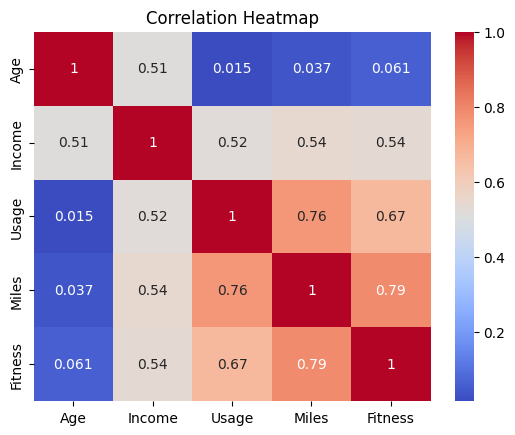

In [42]:
# Compute correlation matrix
corr_matrix = df[['Age', 'Income', 'Usage', 'Miles', 'Fitness']].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Income is positively correlated with Miles and Fitness, suggesting wealthier customers are more active.

Usage and Miles are strongly correlated, indicating frequent users also expect to cover more distance.

**9: Insights & Business Impact**

**9.1 Insights from Data Range & Distribution**
Age: Most customers are between 25–40 years, with KP781 skewing slightly older.

Income: KP781 buyers have significantly higher incomes; KP281 attracts

budget-conscious buyers.

Fitness & Miles: High fitness and higher expected miles correlate with KP781 purchases, indicating these are premium, performance-focused users.

Usage: Casual users prefer KP281, regular runners lean toward KP481, and enthusiasts choose KP781.

**9.2 Insights from Relationships**
Gender: Gender distribution is balanced overall, but KP781 shows slightly more male buyers.

Marital Status: Partnered customers are more likely to purchase KP781, possibly due to higher household incomes.

Correlation Analysis:

Income correlates with Fitness and Miles → wealthier customers expect higher performance.

Usage and Miles are strongly linked → frequent use translates to greater mileage expectations.

**9.3 Insights from Probabilities**
Marginal Probability: KP281 is most common overall, but KP781 has a strong niche in premium segments.

Conditional Probability:

P(Male | KP781) > P(Female | KP781) → targeted campaigns could focus more on male professionals for KP781.

Partnered customers are significantly more likely to choose KP781.

Budget models (KP281) appeal evenly across genders and marital statuses.

**9.4 Business Impact**
These insights allow Aerofit to:

Refine marketing campaigns by aligning each treadmill with its ideal demographic.

Optimize inventory allocation (stock more KP281 in entry-level markets, KP781 in affluent areas).

Tailor pricing strategies based on customer willingness to pay (premium pricing for KP781, promotional discounts for KP281).



**10. Reccomendations**

**10.1 Product Positioning Recommendations**

KP281 (Entry-Level):

-Market as a budget-friendly treadmill for beginners and casual users.

-Promote in regions with lower average income or younger demographics.

-Offer student or first-time buyer discounts.

KP481 (Mid-Range):

-Target regular runners and mid-income households.

-Bundle with loyalty programs (e.g., maintenance plans, fitness memberships).

-Position as a “value for money” treadmill balancing features and price.

KP781 (Premium):

-Focus on high-income, fitness-conscious professionals.

-Use premium marketing campaigns highlighting advanced features.

-Partner with gyms, health clubs, and luxury fitness brands.



**10.2 Marketing & Sales Strategies**

Segmented Advertising: Use gender and marital status insights to run tailored campaigns (e.g., premium ads for partnered customers).

Geographic Targeting: Allocate more premium models to regions with higher incomes.

Upselling Strategy: Encourage KP281 buyers to upgrade to KP481 using installment plans.

**10.3 Operational Recommendations**

Align inventory levels with marginal probabilities (stock more KP281 but maintain sufficient KP781 for premium buyers).

Use probability-driven forecasts to anticipate seasonal demand shifts.

**10.4 Long-Term Recommendations**

Collect additional data (e.g., post-purchase satisfaction, churn rates).

Explore predictive modeling to forecast future product demand.

Continuously refine customer profiles as more sales data accumulates.